## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [31]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [32]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [33]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
data = data.split('\t', -1)
print(len(data))
data[0]

9996


'n00015388_157'

## 將 txt 轉成 pandas dataframe

In [34]:
import pandas as pd

    
df = pd.DataFrame(data)
df.head()

,0
0,n00015388_157
1,http://farm1.static.flickr.com/145/430300483_2...
2,http://farm2.static.flickr.com/1005/3352960681...
3,http://farm1.static.flickr.com/27/51009336_a96...
4,http://farm4.static.flickr.com/3025/2444687979...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

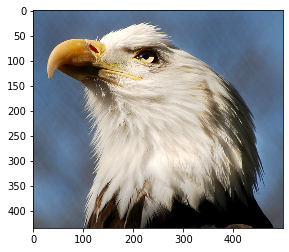

In [40]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[1,0]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [77]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = [ ]
    for url in url_list:
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256,256))
                img = np.array(img)
                img_list.append(img)
        except:
            return img_list

In [78]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

KeyError: 1